In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential

files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"dawudardiansyah","key":"70d8900102176266217a3ba4d53d0a99"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle


kaggle.json


In [ ]:
!kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04           5138        170  1.0              
kaggleashwin/population-dataset                                World Population by Countries Dataset (1960-2021)    69KB  2022-08-31 05:30:26           1555         70  1.0              
iamsouravbanerjee/house-rent-prediction-dataset                House Rent Prediction Dataset                        82KB  2022-08-20 13:49:03          11270        292  1.0              
pantanjali/unemployment-dataset                                Un

In [ ]:
!kaggle datasets download -d sumanthvrao/daily-climate-time-series-data

  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 22.5MB/s]


In [ ]:
!mkdir daily-climate-time-series-data
!unzip daily-climate-time-series-data.zip -d daily-climate-time-series-data
!ls daily-climate-time-series-data

Archive:  daily-climate-time-series-data.zip
  inflating: daily-climate-time-series-data/DailyDelhiClimateTest.csv  
  inflating: daily-climate-time-series-data/DailyDelhiClimateTrain.csv  
DailyDelhiClimateTest.csv  DailyDelhiClimateTrain.csv


In [ ]:
df = pd.read_csv('daily-climate-time-series-data/DailyDelhiClimateTrain.csv')
df.head(10)

,date,meantemp
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000
5,2013-01-06,7.000000
6,2013-01-07,7.000000
7,2013-01-08,8.857143
8,2013-01-09,14.000000
9,2013-01-10,11.000000


In [ ]:
data = df.values
data = data.astype('float32')

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data)

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [ ]:
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [ ]:
df.shape

(1459, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1459 non-null   datetime64[ns]
 1   meantemp  1459 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.9 KB


In [ ]:
df.isnull().sum()

date        0
meantemp    0
dtype: int64

In [ ]:
df['date']=pd.to_datetime(df['date'])
df['date'].head()
df['meantemp'].fillna(df['meantemp'].mean(), inplace=True)
df = df[['date','meantemp' ]]
df.head(10)

,date,meantemp
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000
5,2013-01-06,7.000000
6,2013-01-07,7.000000
7,2013-01-08,8.857143
8,2013-01-09,14.000000
9,2013-01-10,11.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1459 non-null   datetime64[ns]
 1   meantemp  1459 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.9 KB


In [ ]:
delhi=df[['date','meantemp']].copy()
delhi['just_date'] = delhi['date'].dt.date

delhifinal=delhi.drop('date',axis=1)
delhifinal.set_index('just_date', inplace= True)
delhifinal.head(10)

,meantemp
just_date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000
2013-01-06,7.000000
2013-01-07,7.000000
2013-01-08,8.857143
2013-01-09,14.000000


In [ ]:
delhifinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 2013-01-01 to 2016-12-29
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meantemp  1459 non-null   float64
dtypes: float64(1)
memory usage: 22.8+ KB


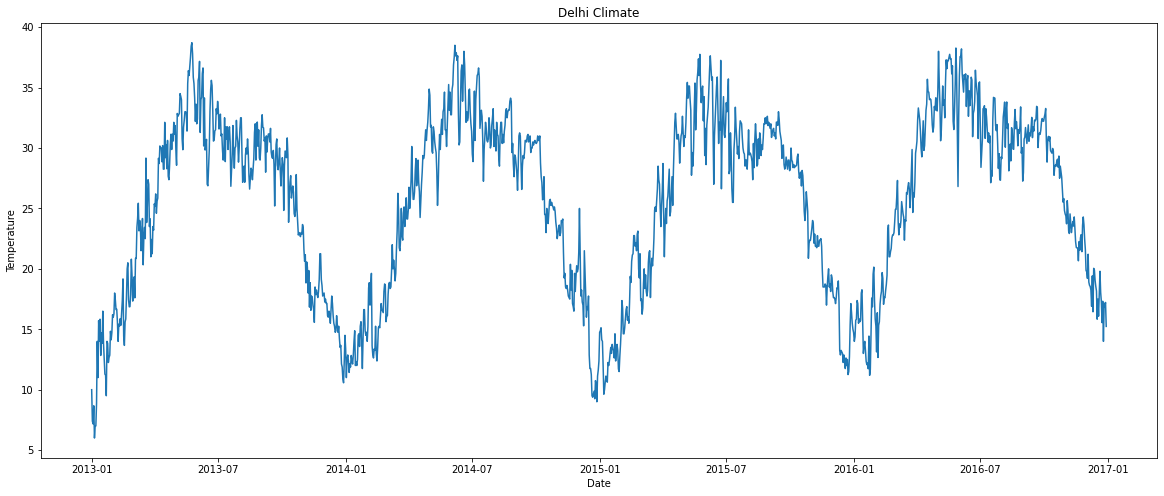

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(delhifinal)
plt.title('Delhi Climate')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

In [ ]:
date = df['date'].values
temp = df['meantemp'].values

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
trainX, testX, trainX, testY = train_test_split(temp, date, test_size = 0.2, random_state = 0 , shuffle=False)
print(len(trainX), len(testY))

1167 292


In [ ]:
#data_trainX = windowed_dataset(trainX, window_size=60, batch_size=100, shuffle_buffer=1000)
#data_testX = windowed_dataset(testX, window_size=60, batch_size=100, shuffle_buffer=1000)

batch_size = 1
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, batch_input_shape=(batch_size, look_back, 1),stateful=True, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

print(trainX.shape, trainY.shape)

(1167,) (966,)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
for i in tqdm.tqdm(range(20)):
    model.fit(trainX, trainY, epochs=3, batch_size=batch_size, verbose=0, shuffle=False)
    model.reset_states()

  0%|          | 0/20 [00:00<?, ?it/s]


ValueError: ignored

In [ ]:
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

ValueError: ignored

In [ ]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [ ]:
max = df['meantemp'].max()
print('Max value : ' )
print(max)

Max value : 
38.71428571428572


In [ ]:
min = df['meantemp'].min()
print('Min Value : ')
print(min)

Min Value : 
6.0


In [ ]:
x = (38.71428571428572 - 6.0) * (10 / 100)
print(x)

3.2714285714285722


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')< x):
      self.model.stop_training = True
      print("\nMAE of the model < 10% of data scale")
callbacks = myCallback()

In [ ]:
tf.keras.backend.set_floatx('float64')
history = model.fit(trainPredict ,epochs=500, validation_data=testPredict, callbacks=[callbacks])

ValueError: ignored

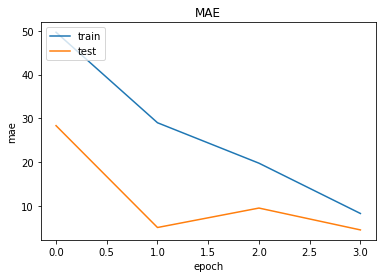

In [ ]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

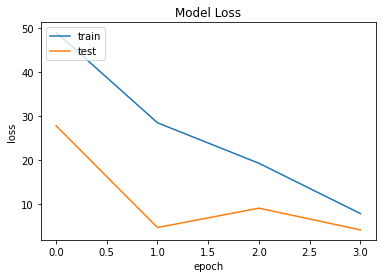

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()